In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/149.9 MB 10.8 MB/s eta 0:00:14
   - -------------------------------------- 4.5/149.9 MB 15.6 MB/s eta 0:00:10
   -- ------------------------------------- 7.9/149.9 MB 15.9 MB/s eta 0:00:09
   --- ------------------------------------ 11.5/149.9 MB 16.5 MB/s eta 0:00:09
   ---- ----------------------------------- 15.5/149.9 MB 17.0 MB/s eta 0:00:08
   ----- ---------------------------------- 18.9/149.9 MB 16.8 MB/s eta 0:00:08
   ------ --------------------------------- 25.2/149.9 MB 19.1 MB/s eta 0:00:07
   -------- ------------------------------- 32.2/149.9 MB 20.9 MB/s eta 0:00:06
   ---------- ----------------------------- 38.8/149.9 MB 22.2 MB/s eta 0:00:05
   ------------ --------------------------- 46.1/149.9 MB 23.7 MB/s eta 0:00:05
   ------------- -------------------------- 52.4/149.9 MB 24.4 MB/s eta 0:00:04
   --------------- ------------------------ 59.0/149

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Remove or comment out the problematic import
# import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
# Comment out or remove the xgboost import until it's installed
# import xgboost as xgb
import pickle

# If you need label encoding functionality, you can use sklearn directly:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("Dataset/garments_worker_productivity.csv")

data.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


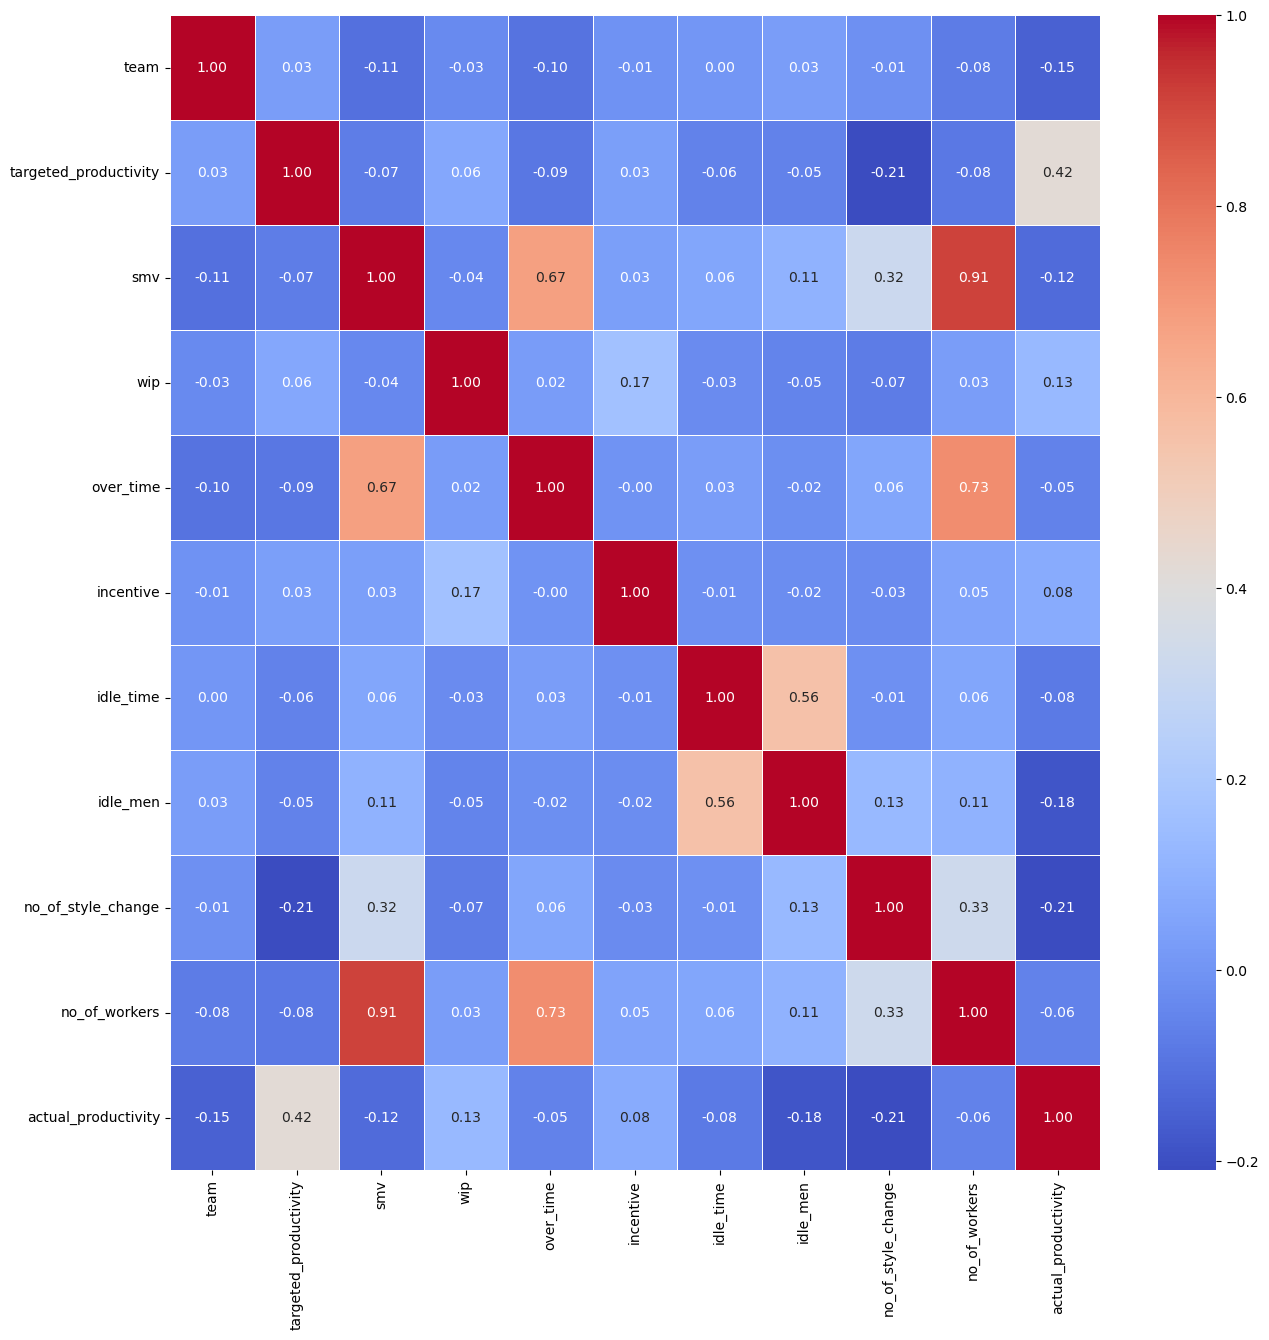

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy


data['date'] = pd.to_datetime(data['date'])

numeric_data = data.select_dtypes(include=np.number)

corrMatrix = numeric_data.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax, fmt='.2f', cmap='coolwarm')
plt.show()

In [13]:
data.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


In [14]:
data.shape

(1197, 15)

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [16]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [17]:
data.drop(['wip'], axis=1, inplace=True)

In [18]:
data["date"] = pd.to_datetime(data["date"])


In [19]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [20]:
data['month']=data['date'].dt.month
data.drop(['date'], axis=1, inplace=True)

In [21]:
data.month

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32

In [22]:
data['department'].value_counts()


department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [23]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace(" ", "") == 'finishing' else 'sweing' )


In [24]:
data['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode

    def fit(self, X, y=None):
        return self # not relevant here

    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                if col.dtype == 'object':
                    output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [27]:
# Specify the categorical columns you want to encode
categorical_cols = ['quarter', 'department', 'day']

# Create an instance of the encoder
Mcle = MultiColumnLabelEncoder(columns=categorical_cols)

# Apply the encoder to your data
data = Mcle.fit_transform(data)

# Verify the changes
data.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


In [28]:
from sklearn.model_selection import train_test_split

# Separate features (x) and target (y)
x = data.drop(['actual_productivity'], axis=1)
y = data['actual_productivity']

# Convert the features DataFrame to a NumPy array
X = x.to_numpy()

# Splitting the data
# Using variable names as they appear in the image
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize the Model
# This creates a fresh instance of the Linear Regression model.
model_lr = LinearRegression()

# 2. Train the Model
# The model 'learns' from the training data (x_train, y_train).
model_lr.fit(x_train, y_train)

# 3. Make Predictions on the Test Data
# Use the trained model to predict outcomes for the unseen x_test data.
pred_test = model_lr.predict(x_test)

# 4. Evaluate the Model's Performance
# Compare the model's predictions (pred_test) with the actual answers (y_test).
print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.020952954761875597
test_MAE: 0.1063600121554998
R2_score:0.29131231547755654


In [30]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Model
# We create a Random Forest model with 200 decision trees,
# each with a maximum depth of 5 levels.
model_rf = RandomForestRegressor(n_estimators=200, max_depth=5)

# 2. Train the Model
# The model builds its 'forest' of decision trees based on the training data.
model_rf.fit(x_train, y_train)

# 3. Make Predictions on the Test Data
pred = model_rf.predict(x_test)

# 4. Evaluate the Model's Performance
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.01548969816370314
test_MAE: 0.08570275785308289
R2_score:0.47609497322258876


In [31]:
import xgboost as xgb

# 1. Initialize the Model
# We create an XGBoost model with specific parameters.
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)

# 2. Train the Model
# The model learns by building a sequence of trees, each correcting the last.
model_xgb.fit(x_train, y_train)

# 3. Make Predictions on the Test Data
pred3 = model_xgb.predict(x_test)

# 4. Evaluate the Model's Performance
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.015048792808164598
test_MAE: 0.07904341491293163
R2_score:0.4910076286958249


In [32]:
import pickle

# The trained model object you want to save (assuming XGBoost was best)
model_to_save = model_xgb 

# 1. Save the model in the 'Training files' directory
with open('Training files/gwp.pkl', 'wb') as file:
    pickle.dump(model_to_save, file)

# 2. Also save a copy in the 'Flask' directory for the web app
with open('Flask/gwp.pkl', 'wb') as file:
    pickle.dump(model_to_save, file)

print("Model saved successfully as gwp.pkl")

Model saved successfully as gwp.pkl
